In [40]:
import numpy as np
import pandas as pd                


In [41]:
df=pd.DataFrame()

In [42]:
df['X1']=[8,4,3,4,9,6,7,8,9,3]
df['X2']=[1,6,4,2,3,7,1,9,5,2]
df['label']=[1,0,0,1,0,1,1,0,1,0]

In [43]:
df

,X1,X2,label
0,8,1,1
1,4,6,0
2,3,4,0
3,4,2,1
4,9,3,0
5,6,7,1
6,7,1,1
7,8,9,0
8,9,5,1
9,3,2,0


In [44]:
df['weights']=1/len(df)

In [45]:
df

,X1,X2,label,weights
0,8,1,1,0.1
1,4,6,0,0.1
2,3,4,0,0.1
3,4,2,1,0.1
4,9,3,0,0.1
5,6,7,1,0.1
6,7,1,1,0.1
7,8,9,0,0.1
8,9,5,1,0.1
9,3,2,0,0.1


In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
dt1=DecisionTreeClassifier(max_depth=1)

In [48]:
X=df.iloc[:,:2].values
y=df.iloc[:,2].values


In [49]:
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 3.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.625, 0.5, '  False')]

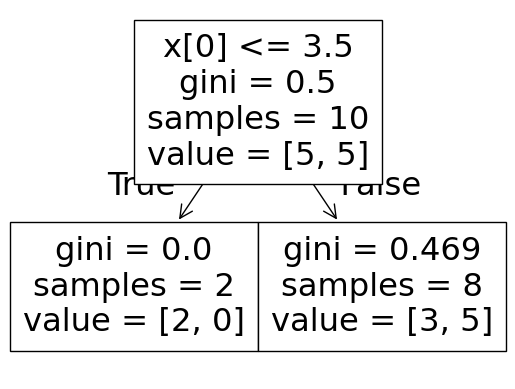

In [50]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

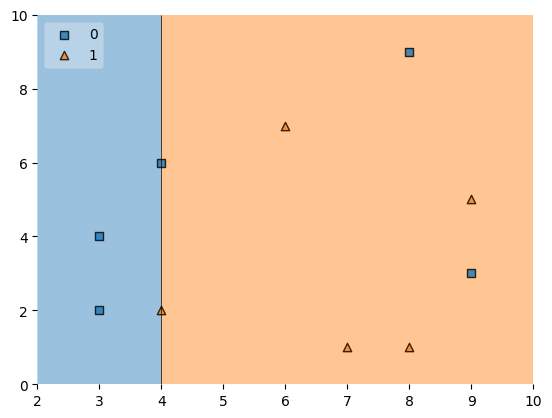

In [51]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y, clf=dt1, legend=2)

In [52]:
df['y_pred']=dt1.predict(X)

In [53]:
df

,X1,X2,label,weights,y_pred
0,8,1,1,0.1,1
1,4,6,0,0.1,1
2,3,4,0,0.1,0
3,4,2,1,0.1,1
4,9,3,0,0.1,1
5,6,7,1,0.1,1
6,7,1,1,0.1,1
7,8,9,0,0.1,1
8,9,5,1,0.1,1
9,3,2,0,0.1,0


In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(df['label'],df['y_pred'])

0.7

In [55]:
def calculate_model_weights(error):
    return 0.5 * np.log((1 - error) / (error))

In [56]:
alpha1=calculate_model_weights(0.3) 
alpha1

np.float64(0.42364893019360184)

In [57]:
def update_row_weights(row,alpha1=0.4236):
    if row['label']==row['y_pred']:
        return row['weights']*np.exp(-alpha1)
    else:
        return row['weights']*np.exp(alpha1)

In [58]:
df['updated_weights']=df.apply(update_row_weights,axis=1)

In [60]:
df['normalized_weights']=df['updated_weights']/df['updated_weights'].sum()

In [61]:
df['normalized_weights'].sum()

np.float64(1.0)

In [ ]:
df['cumsum_upper']=np.cumsum(df['normalized_weights'])


In [63]:
df['cumsum_lower']=df['cumsum_upper']-df['normalized_weights']

In [64]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
0,8,1,1,0.1,1,0.065469,0.071432,0.071432,0.000000
1,4,6,0,0.1,1,0.152745,0.166659,0.238091,0.071432
2,3,4,0,0.1,0,0.065469,0.071432,0.309523,0.238091
3,4,2,1,0.1,1,0.065469,0.071432,0.380955,0.309523
4,9,3,0,0.1,1,0.152745,0.166659,0.547613,0.380955
5,6,7,1,0.1,1,0.065469,0.071432,0.619045,0.547613
6,7,1,1,0.1,1,0.065469,0.071432,0.690477,0.619045
7,8,9,0,0.1,1,0.152745,0.166659,0.857136,0.690477
8,9,5,1,0.1,1,0.065469,0.071432,0.928568,0.857136
9,3,2,0,0.1,0,0.065469,0.071432,1.000000,0.928568
